# 7. Natural Language Processing

Wordle polega na odgadnięciu 5-literowego słowa na podstawie wskazówek o występujących literach:

https://wordlegame.org/

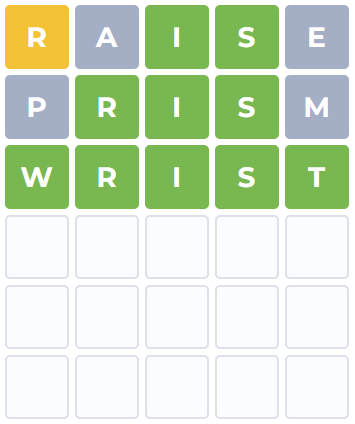

Lista słów które mogą być rozwiązaniem ma 2309 pozycji i jest dostępna [tutaj](https://drive.google.com/file/d/1I0i3X2s28c9iYULJvq9GWDlQVo_oPSe4/view?usp=sharing).

Lista słów akceptowanych jest większa [tutaj](https://drive.google.com/file/d/1R78GyUcub6yeD4qmFoXmkRK3KBU98EEN/view?usp=sharing), ale z uwagi na ograniczony czas można pozostać przy podstawowej puli.


## Zadanie: 
1. Znajdź optymalne słowo rozpoczynające rozgrywkę. 

2. Zaimplementuj algorytm wygrywający Wordle w jak najniższej liczbie prób trafień.

Można korzystać z dowolnej własnej strategii i dowolnie wybranej techniki.

In [1]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 May  3 13:42 .
drwxr-xr-x 1 root root 4096 May 16 10:49 ..
drwxr-xr-x 4 root root 4096 May  3 13:41 .config
drwxr-xr-x 1 root root 4096 May 16 10:50 sample_data


In [2]:
import numpy as np
import random
from collections import Counter
import sys
from termcolor import colored, cprint
import copy

In [3]:
def LetterCount(text):
    return Counter(c for c in text.lower() if c.isalpha())

In [4]:
example1 = "/content/sample_data/word_pull_machine.txt"
with open(example1, "r") as file1:
    words_list = file1.readlines()

for i in range(len(words_list)):
  words_list[i] = words_list[i][:-1]

print(words_list)

['aback', 'abase', 'abate', 'abbey', 'abbot', 'abhor', 'abide', 'abled', 'abode', 'abort', 'about', 'above', 'abuse', 'abyss', 'acorn', 'acrid', 'actor', 'acute', 'adage', 'adapt', 'adept', 'admin', 'admit', 'adobe', 'adopt', 'adore', 'adorn', 'adult', 'affix', 'afire', 'afoot', 'afoul', 'after', 'again', 'agape', 'agate', 'agent', 'agile', 'aging', 'aglow', 'agony', 'agree', 'ahead', 'aider', 'aisle', 'alarm', 'album', 'alert', 'algae', 'alibi', 'alien', 'align', 'alike', 'alive', 'allay', 'alley', 'allot', 'allow', 'alloy', 'aloft', 'alone', 'along', 'aloof', 'aloud', 'alpha', 'altar', 'alter', 'amass', 'amaze', 'amber', 'amble', 'amend', 'amiss', 'amity', 'among', 'ample', 'amply', 'amuse', 'angel', 'anger', 'angle', 'angry', 'angst', 'anime', 'ankle', 'annex', 'annoy', 'annul', 'anode', 'antic', 'anvil', 'aorta', 'apart', 'aphid', 'aping', 'apnea', 'apple', 'apply', 'apron', 'aptly', 'arbor', 'ardor', 'arena', 'argue', 'arise', 'armor', 'aroma', 'arose', 'array', 'arrow', 'arson', 

In [5]:
letters_counts = LetterCount("")
for word in words_list:
  letters_counts += LetterCount(word)

print(letters_counts)

Counter({'e': 1230, 'a': 975, 'r': 897, 'o': 753, 't': 729, 'l': 716, 'i': 670, 's': 668, 'n': 573, 'c': 475, 'u': 466, 'y': 424, 'd': 393, 'h': 387, 'p': 365, 'm': 316, 'g': 310, 'b': 280, 'f': 229, 'k': 210, 'w': 194, 'v': 152, 'z': 40, 'x': 37, 'q': 29, 'j': 27})


In [6]:
def FindMostCommonLetters(letters_counts, num):
  available_letters = []
  for i in range(num):
    available_letters.append(letters_counts.most_common()[i][0])
  return available_letters


def FindOptimalWord(words_list, available_letters):
  optimal_word = ""
  max_count = 0
  for word in words_list:
    temp_count = 0
    for i in range(len(available_letters)):
      if available_letters[i] in word:
        temp_count += 1
    if temp_count > max_count:
      max_count = temp_count
      optimal_word = word
  return optimal_word

In [7]:
optimal_word = ""
max_count = 0
available_letters = FindMostCommonLetters(letters_counts, 6)
# print(available_letters)

optimal_word = FindOptimalWord(words_list, available_letters)
print("Optimal word for the first try:")
print(optimal_word)


Optimal word for the first try:
alert


In [8]:
def PrintAndCheckWord(word_guess, guess):
  outcome = list(guess)
  word_to_guess = list(word_guess)
  result = []
  indexes = []
  indx = []
  for i in range(len(word_to_guess)):
    if word_to_guess[i] == guess[i]:
      outcome[i] = colored(outcome[i], 'green')
    else:
      indexes.append(i)

  for i in indexes:
    if word_guess.find(outcome[i]) != -1:
      outcome[i] = colored(outcome[i], 'yellow')
      indx.append(i)
  indexes, indx = list(set(indexes).difference(indx)), list(set(indx).difference(indexes))

  for i in indexes:
    outcome[i] = colored(outcome[i], 'grey')

  for i, letter in enumerate(list(guess)):
    if letter in word_to_guess:
        if word_to_guess[i] == letter:
          # 2 is for green
          result.append('2')
        else:
          # 1 is for yellow
          result.append('1')
    else:
      # 0 is for grey
      result.append('0')
  
  return "".join(outcome), result


In [9]:
# word_to_guess = random.choice(words_list)
word_to_guess = "wletr"
guess = "alert"

printGuess, ratedGuess = PrintAndCheckWord(word_to_guess, guess)
print(printGuess)
print(ratedGuess)

alert
['0', '2', '2', '1', '1']


In [10]:
def reduce_possible_answers(guessed_letters, guessed_word, available_words):
  reduced_words = copy.deepcopy(available_words)
  for i, letter in enumerate(list(guessed_word)):
    if guessed_letters[i] == '2':
      for word in available_words:
        if word[i] != letter and word in reduced_words:
          reduced_words.remove(word)
    elif guessed_letters[i] == '1':
      for word in available_words:
        if word[i] == letter and word in reduced_words:
          reduced_words.remove(word)
        if not letter in word and word in reduced_words:
          reduced_words.remove(word)
    else:
      for word in available_words:
        if letter in word and word in reduced_words:
          reduced_words.remove(word)

  return reduced_words


In [11]:
word_to_guess = "abhor"
guess = "alert"
printGuess, ratedGuess = PrintAndCheckWord(word_to_guess, guess)
reduced_dict = reduce_possible_answers(ratedGuess, guess, words_list)
print(printGuess)
print(ratedGuess)
print("Words at the start:\n")
print(words_list)
print(len(words_list))
print("Words left:\n")
print(reduced_dict)
print(len(reduced_dict))

alert
['2', '0', '0', '1', '0']
Words at the start:

['aback', 'abase', 'abate', 'abbey', 'abbot', 'abhor', 'abide', 'abled', 'abode', 'abort', 'about', 'above', 'abuse', 'abyss', 'acorn', 'acrid', 'actor', 'acute', 'adage', 'adapt', 'adept', 'admin', 'admit', 'adobe', 'adopt', 'adore', 'adorn', 'adult', 'affix', 'afire', 'afoot', 'afoul', 'after', 'again', 'agape', 'agate', 'agent', 'agile', 'aging', 'aglow', 'agony', 'agree', 'ahead', 'aider', 'aisle', 'alarm', 'album', 'alert', 'algae', 'alibi', 'alien', 'align', 'alike', 'alive', 'allay', 'alley', 'allot', 'allow', 'alloy', 'aloft', 'alone', 'along', 'aloof', 'aloud', 'alpha', 'altar', 'alter', 'amass', 'amaze', 'amber', 'amble', 'amend', 'amiss', 'amity', 'among', 'ample', 'amply', 'amuse', 'angel', 'anger', 'angle', 'angry', 'angst', 'anime', 'ankle', 'annex', 'annoy', 'annul', 'anode', 'antic', 'anvil', 'aorta', 'apart', 'aphid', 'aping', 'apnea', 'apple', 'apply', 'apron', 'aptly', 'arbor', 'ardor', 'arena', 'argue', 'arise', '

In [12]:
def choose_best_word(possible_answers, word_to_guess):
  next_move = []
  for answer in possible_answers:
    not_important, result = PrintAndCheckWord(word_to_guess, answer)
    next_move.append(len(reduce_possible_answers(result, answer, possible_answers)))
  min_val = min(next_move)
  possible_indexes = []
  # word_index = next_move.index(min(next_move))
  for i in range(len(next_move)):
    if next_move[i] == min_val:
      possible_indexes.append(i)
  # print(next_move)
  # print(possible_indexes)
  word_index = random.choice(possible_indexes)
  best_word = possible_answers[word_index]
  return best_word


In [13]:
word_to_guess = random.choice(words_list)
word_to_guess = "diner"
# word_to_guess = "haste"
print("Word to guess: " + str(word_to_guess))
print("Possible words (" + str(len(words_list)) + ") :" + str(words_list))

guess = copy.deepcopy(optimal_word)
number_of_guesses = 0
while True:
  printGuess, ratedGuess = PrintAndCheckWord(word_to_guess, guess)
  print("Guessed word: ")
  print(printGuess)
  number_of_guesses += 1
  reduced_dict = reduce_possible_answers(ratedGuess, guess, words_list)
  print("Possible answers (" + str(len(reduced_dict)) + ") :")
  print(reduced_dict)
  guess = choose_best_word(reduced_dict, word_to_guess)
  if guess == word_to_guess:
    printGuess, ratedGuess = PrintAndCheckWord(word_to_guess, guess)
    number_of_guesses += 1
    print("The answer is: " + str(printGuess))
    print("Number of guesses: " + str(number_of_guesses))
    break


Word to guess: diner
Possible words (2309) :['aback', 'abase', 'abate', 'abbey', 'abbot', 'abhor', 'abide', 'abled', 'abode', 'abort', 'about', 'above', 'abuse', 'abyss', 'acorn', 'acrid', 'actor', 'acute', 'adage', 'adapt', 'adept', 'admin', 'admit', 'adobe', 'adopt', 'adore', 'adorn', 'adult', 'affix', 'afire', 'afoot', 'afoul', 'after', 'again', 'agape', 'agate', 'agent', 'agile', 'aging', 'aglow', 'agony', 'agree', 'ahead', 'aider', 'aisle', 'alarm', 'album', 'alert', 'algae', 'alibi', 'alien', 'align', 'alike', 'alive', 'allay', 'alley', 'allot', 'allow', 'alloy', 'aloft', 'alone', 'along', 'aloof', 'aloud', 'alpha', 'altar', 'alter', 'amass', 'amaze', 'amber', 'amble', 'amend', 'amiss', 'amity', 'among', 'ample', 'amply', 'amuse', 'angel', 'anger', 'angle', 'angry', 'angst', 'anime', 'ankle', 'annex', 'annoy', 'annul', 'anode', 'antic', 'anvil', 'aorta', 'apart', 'aphid', 'aping', 'apnea', 'apple', 'apply', 'apron', 'aptly', 'arbor', 'ardor', 'arena', 'argue', 'arise', 'armor', '

In [14]:
def playWordleAutomate():
  word_to_guess = random.choice(words_list)
  print("Word to guess: ", word_to_guess)
  guess = copy.deepcopy(optimal_word)
  print("Our guess: ",guess)
  number_of_guesses = 0
  while True:
    printGuess, ratedGuess = PrintAndCheckWord(word_to_guess, guess)
    number_of_guesses += 1
    reduced_dict = reduce_possible_answers(ratedGuess, guess, words_list)
    guess = choose_best_word(reduced_dict, word_to_guess)
    print("Our guess: ",guess)
    if guess == word_to_guess:
      printGuess, ratedGuess = PrintAndCheckWord(word_to_guess, guess)
      number_of_guesses += 1
      break
    
  return number_of_guesses

In [15]:
number_of_games = 100
sum_of_guesses1 = 0
sum_of_guesses2 = 0

# Wersja ze zgadywaniem do skutku
for i in range(number_of_games):
  sum_of_guesses1 += playWordleAutomate()

# Wersja gdzie mamy maks 6 prób, a potem przegrywamy
for i in range(number_of_games):
  num_of_guesses = playWordleAutomate()
  if num_of_guesses > 6:
    sum_of_guesses2 += 6
  else:
    sum_of_guesses2 += num_of_guesses

print("Average number of tries (version without limited attempts): " + str(sum_of_guesses1/number_of_games))
print("Average number of tries (version with a limit of 6 attempts): " + str(sum_of_guesses2/number_of_games))

Word to guess:  spray
Our guess:  alert
Our guess:  foray
Our guess:  stray
Our guess:  spray
Word to guess:  dicey
Our guess:  alert
Our guess:  deuce
Our guess:  dicey
Word to guess:  poker
Our guess:  alert
Our guess:  perky
Our guess:  poker
Word to guess:  smite
Our guess:  alert
Our guess:  tempo
Our guess:  smelt
Our guess:  smote
Our guess:  smite
Word to guess:  poise
Our guess:  alert
Our guess:  pixie
Our guess:  prime
Our guess:  poise
Word to guess:  trawl
Our guess:  alert
Our guess:  trail
Our guess:  trawl
Word to guess:  sport
Our guess:  alert
Our guess:  sport
Word to guess:  spore
Our guess:  alert
Our guess:  spire
Our guess:  spare
Our guess:  spore
Word to guess:  tilde
Our guess:  alert
Our guess:  title
Our guess:  tilde
Word to guess:  gaudy
Our guess:  alert
Our guess:  dogma
Our guess:  gland
Our guess:  gaudy
Word to guess:  cover
Our guess:  alert
Our guess:  curve
Our guess:  cover
Word to guess:  hasty
Our guess:  alert
Our guess:  match
Our guess:  hast